In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo CSV subido
df = pd.read_csv("housing.csv")
#del df['ocean_proximity']
df = pd.get_dummies(df)
df = df.fillna(df.mean())

X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

nombres_limpios = [col.replace('<', '').replace('>', '').replace('[', '').replace(']', '') for col in X.columns]
X.columns = nombres_limpios


### Escalar datos y hacer PCA

In [23]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])
pipeline.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [24]:
# Obten el objeto de PCA
objecto_pca = pipeline.named_steps['pca']


In [25]:
len(X.keys())

13

In [26]:
X_pca= pipeline.transform(X)
x_components = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
x_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-2.375111,1.858058,-2.789762,0.099758,1.382388,0.373647,1.788786,-0.024894,0.175938,-0.250550,0.145763,-0.067212,-1.925824e-15
1,2.617723,2.714887,-2.781672,0.104062,1.572170,0.445566,1.594817,-0.484008,-0.354827,0.039535,-0.027019,0.266951,-4.257292e-15
2,-2.257997,1.938945,-2.938880,0.216968,0.472146,0.173484,1.796909,0.459729,0.099150,-0.033039,0.104118,-0.048443,-1.925824e-15
3,-2.210764,2.030104,-2.689386,0.237120,-0.216221,0.005836,1.503468,0.155376,0.056837,-0.034649,0.077560,-0.038663,-2.036846e-15
4,-2.073292,2.149514,-2.420998,0.262479,-0.953494,-0.171632,1.202670,-0.152623,-0.101422,0.177669,0.009693,0.009757,-2.591957e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-1.154527,2.099671,1.584531,-0.564314,-0.335252,-0.097306,-0.718325,0.055053,-0.122448,0.099142,0.395915,0.137862,-2.841758e-15
20636,-1.961548,1.937474,1.691384,-0.673679,0.509235,0.085962,-0.694854,-0.281484,-0.018039,0.067396,0.374592,0.090721,-2.397668e-15
20637,-0.559456,2.212189,1.701540,-0.615767,-0.011015,-0.025403,-0.828813,-0.308924,-0.200370,0.077075,0.320970,0.138308,-2.619713e-15
20638,-0.969095,2.162271,1.677224,-0.624498,0.084631,-0.005064,-0.808155,-0.270878,-0.238012,0.069520,0.294299,0.108453,-2.286646e-15


Text(0, 0.5, 'Componente 2')

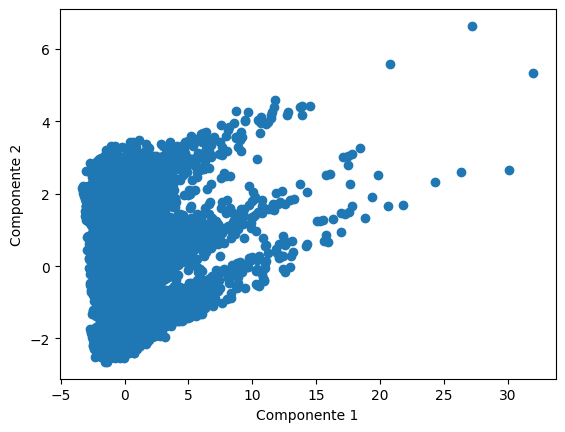

In [27]:
plt.scatter(x_components['PC1'], x_components['PC2'])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

### Varianza explicada

Si la primera componente principal se obtiene con el eigenvalor que máximiza la varianza.

La varianza explicada por cada componente principal 

$$varianza_i = \frac{Eigenvalor_i}{\Sigma{Eigenvalores}}$$


In [ ]:
objecto_pca.explained_variance_ratio_[0]

0.3015428987769535

### Entendiendo primera componente

In [31]:
objecto_pca.explained_variance_ratio_[1]

0.19738656527320114

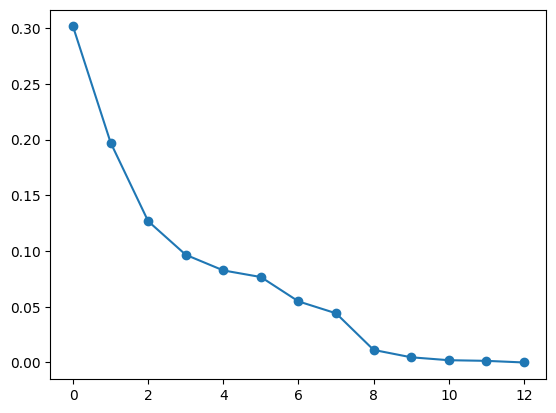

In [35]:
plt.plot(objecto_pca.explained_variance_ratio_, marker='o')

### Entendiendo primera componente

In [36]:
componente1= pd.DataFrame({
    'feature':X.keys(),
    'pesos': objecto_pca.components_[0]
})
componente1

,feature,pesos
0,longitude,0.101538
1,latitude,-0.099569
2,housing_median_age,-0.220563
3,total_rooms,0.478316
4,total_bedrooms,0.484269
5,population,0.469222
6,households,0.486598
7,median_income,0.048330
8,ocean_proximity_1H OCEAN,0.057847
9,ocean_proximity_INLAND,-0.012784


### Entendiendo segunda componente

In [37]:
componente2= pd.DataFrame({
    'feature':X.keys(),
    'pesos': objecto_pca.components_[1]
})
componente2

,feature,pesos
0,longitude,-0.515239
1,latitude,0.563595
2,housing_median_age,-0.026872
3,total_rooms,0.100905
4,total_bedrooms,0.090788
5,population,0.052088
6,households,0.085387
7,median_income,-0.088896
8,ocean_proximity_1H OCEAN,-0.435594
9,ocean_proximity_INLAND,0.290002


### Obtener las componentes principales

pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [20]:

# Transformar los datos

# Crear DataFrame con nombres de columnas


### Visualizar componentes principales

## Modelos de datos

### Primero con todos los features

In [38]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

model= XGBRegressor().fit(X, y)
predicciones = model.predict(X)
r2_score(y_true=y, y_pred=predicciones)

0.9326267577509099

### Ahora con las componentes principales

In [39]:
x_pc12= x_components[['PC1', 'PC2']]

model= XGBRegressor().fit(x_pc12, y)
predicciones = model.predict(x_pc12)
r2_score(y_true=y, y_pred=predicciones) 

0.3401837086574726

### Ahora solo con las primeras 3 componentes

In [55]:
x_pc12= x_components[['PC1', 'PC2','PC3']]

model= XGBRegressor().fit(x_pc12, y)
predicciones = model.predict(x_pc12)
r2_score(y_true=y, y_pred=predicciones) 

0.697516358429598

### Con todas

In [44]:
model= XGBRegressor(max_depth= 6 , learning_rate= 0.1, n_estimators= 500).fit(x_components, y)
predicciones = model.predict(x_components)
r2_score(y_true=y, y_pred=predicciones) 

0.950059560927102

In [50]:
importancias = pd.DataFrame({
    'feature':x_components.keys(),
    'importancia': model.feature_importances_
})
importancias.sort_values(by='importancia', ascending=False, inplace=True)
importancias

,feature,importancia
5,PC6,0.289703
2,PC3,0.287420
6,PC7,0.075609
7,PC8,0.072481
8,PC9,0.057691
12,PC13,0.040982
4,PC5,0.039895
10,PC11,0.032828
3,PC4,0.030438
9,PC10,0.029355


### Con los mejores 3 componentes

In [56]:
x_pc12= x_components[['PC6', 'PC3','PC13']]

model= XGBRegressor().fit(x_pc12, y)
predicciones = model.predict(x_pc12)
r2_score(y_true=y, y_pred=predicciones) 

0.7526522518626445

### Conclusión: a medida que agregamos más componentes aumenta el poder predictivo pero se pierde el objetivo inicial que es tener menos dimensiones

### Clustering + PCA

In [59]:
from sklearn.cluster import KMeans

pipeline= Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=2))
])
pipeline.fit(X)



Pipeline(steps=[('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=2))])

In [60]:
x_components['cluster']= pipeline.predict(X) +1

Text(0, 0.5, 'Componente 2')

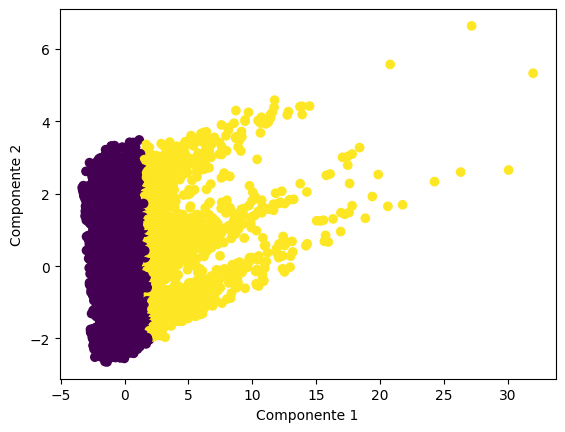

In [71]:
plt.scatter(x_components['PC1'], x_components['PC2'], c=x_components['cluster'])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')  
